In [1]:
# -*- coding: utf-8 -*-
"""
Input: "CkipNewsCis18850-KccDict2020.txt"
Output: "CkipNewsCis18850-KccDict2020-MalletNum12.txt"

@author: johnson
"""
# When numpy version = 1.19.2 => gensim version should downgrade to 3.8.3
from gensim import corpora, models, utils
from gensim.models import LdaModel
from gensim.models import CoherenceModel

In [2]:
fList = []
with open("CkipNewsCis18850-KccDict2020.txt","r", encoding='utf-8-sig') as files:
     for file in files:
        #simple_preprocess: tokenize,去除標點 - gensim.utils.simple_preprocess(doc, deacc=False, min_len=2, max_len=15)
        fList.append(list(utils.simple_preprocess(file, deacc=True, min_len=2,)))
print("fList[:2] = ", fList[:2])
print("------------------------------")

fList[:2] =  [['馬英九', '昨天', '上午', '視察', '衛武營藝術文化中心', '文化部', '洪孟啟', '工程', '副主委', '顏久榮', '高雄市', '副市長', '吳宏謀', '一同', '到場', '聽取', '衛武營', '興建', '工程', '簡報', '瞭解', '工程進度', '執行', '情形', '完成', '百分之九十五', '工程進度', '共計', '投入', '新臺幣', '一百零五億八千萬', '經費', '預計', '六月', '竣工', '明年', '開館', '營運', '目標', '馬英九', '指出', '衛武營', '案子', '九十四年', '編列', '預算', '核定', '施工', '正式', '完工', '時間', '長達', '十三', '原先', '預計', '故宮', '南院', '工程', '單位', '部門', '克服', '困難', '值得', '檢討', '總統', '致詞', '民國', '九十九年', '主持', '動土', '典禮', '原從', '黃土', '生長出', '有如', '魟魚', '悠遊', '海浪', '建築', '實在', '驚豔', '過程', '包含', '團隊', '付出', '努力', '籌建', '過程', '艱辛', '各界', '關注', '投入', '新建', '工程', '幾近', '完工', '特別', '肯定', '文化部', '籌建', '過程', '付出', '辛勞', '高雄市政府', '各界', '支持', '配合', '總統', '文化', '城市', '期許', '衛武營藝術文化中心', '臺灣', '藝術', '力量', '南方', '集結地', '臺北', '國家兩廳院', '臺中', '國家歌劇院', '攜手', '並進', '打造', '台灣', '國際', '藝文', '版圖', '地標', '文化部', '洪孟啟', '衛武營', '考驗', '面臨', '營運', '壓力', '文化部', '衛武營', '南部', '高雄市文化中心', '嘉義', '文化', '園區', '故宮', '南院', '台南', '地方', '藝文', '團體', '高雄大東文化藝術中心', '屏東', '演藝廳'

In [3]:
# creat a unique id for each word segment
dict = corpora.Dictionary(list(fList))
print("dict = ", dict)
print("------------------------------")

dict =  Dictionary(113533 unique tokens: ['一同', '一百零五億八千萬', '上午', '並進', '主持']...)
------------------------------


In [4]:
# creat mapping matrix of [word_id, word_frequency] for each word segment
corpus = [dict.doc2bow(text) for text in fList]   
print("corpus[:1] = ", corpus[:1])  
print("================================================")

print("print lists of [word:frequency]")
[[print((dict[id], freq)) for id,freq in cp] for cp in corpus[:1]]
print("======================================================")

corpus[:1] =  [[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 3), (28, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 3), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 1), (49, 1), (50, 1), (51, 4), (52, 2), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 2), (69, 4), (70, 5), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 1), (88, 1), (89, 2), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 2), (102, 1), (103, 1), (104, 1), (105, 1), (106, 2), (107, 1), (108, 1), (109

In [7]:
import os

import gensim
# os.envirom.update({'MALLET_HOME':r'C:/mallet-2.0.8/'})
mallet_path = r'//Users/Binying/mallet/bin/mallet'
#'OS(C:)/mallet-2.0.8/bin/mallet'
ldamal = gensim.models.wrappers.LdaMallet(mallet_path, id2word=dict, corpus=corpus, num_topics=20)
output = open("CkipNewsCis18850-KccDict2020-MalletNum20.txt", 'w', encoding='utf-8-sig')

#print(ldamal.show_topics(formatted=False))
# 列出最重要的前若干个主题
lsTM = ldamal.show_topics(num_topics=20, num_words=20, log=False, formatted=False)
for tupleTM in lsTM:
        str1 = "".join(str(x) for x in tupleTM)
        #print("type(str1) = ", type(str1))
        str1 += "\n"
        print("strTM = ", str1)
        output.write(str1)
output.close()
 
#  print("------------------------------")
#  print("Perplexity = ", ldamal.log_perplexity(corpus))

print("------------------------------")
cm = models.CoherenceModel(model=ldamal, texts=list(fList), dictionary= dict, coherence= 'c_v')
coher_lda = cm.get_coherence()
print("\n Coherence Score: ", coher_lda)


strTM =  0[('高雄市', 0.03768563825221049), ('中央', 0.019708415600766877), ('補助', 0.013577703379403096), ('預算', 0.01308409877814977), ('去年', 0.011782127221220705), ('市府', 0.011352905828826509), ('台北市', 0.009800555126334163), ('政府', 0.009771940366841217), ('財政', 0.009399948493432913), ('經費', 0.008849114373193693), ('建設', 0.008276819183334764), ('明年', 0.007640140784616705), ('減少', 0.00752568174664492), ('人口', 0.007489913297278736), ('縣市', 0.0074112227086731335), ('編列', 0.0069748476264057), ('指出', 0.0066815463416029985), ('調整', 0.006581394683377686), ('平均', 0.006173634360603199), ('黃淑美', 0.006073482702377887)]

strTM =  1[('市長', 0.0570083852950469), ('局長', 0.04249663171885838), ('議員', 0.034274757320337156), ('裡面', 0.01857184879595298), ('本席', 0.01689043190261582), ('答覆', 0.015626645555139942), ('真的', 0.015445067056939385), ('市政府', 0.014787752893453368), ('回答', 0.013814492143098383), ('辦法', 0.013691018764322004), ('地方', 0.012619705624938717), ('時間', 0.01253254794580245), ('報告', 0.0122964958981

In [8]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    # global mallet_path, dict
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dict)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        coher = coherencemodel.get_coherence()
        print("Num_topics: ", num_topics, " Coherence Score= ", coher)
    return model_list, coherence_values

In [9]:
lim=24; sta=3; ste=3;
model_list, coherence_values = compute_coherence_values(dictionary=dict, corpus=corpus, texts=list(fList), limit=lim, start=sta, step=ste)

Num_topics:  3  Coherence Score=  0.46665642145526814
Num_topics:  6  Coherence Score=  0.502932817172299
Num_topics:  9  Coherence Score=  0.5479402539304318
Num_topics:  12  Coherence Score=  0.5543950405743967
Num_topics:  15  Coherence Score=  0.5829795360219332
Num_topics:  18  Coherence Score=  0.5845334958280547
Num_topics:  21  Coherence Score=  0.5943481889136069


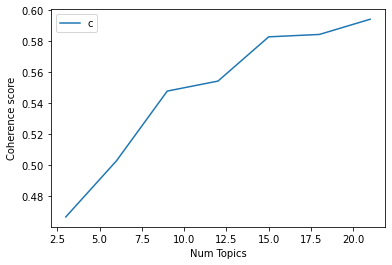

In [10]:
# Show graph
import matplotlib.pyplot as plt

limit=lim; start=sta; step=ste;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [11]:
# Print the coherence scores
optNum = 0
maxCV = 0
for m, cv in zip(x, coherence_values):
    # maxCV = lambda cv, maxCV: cv if cv > maxCV else maxCV
    if cv > maxCV:
        optNum = m
        maxCV = cv 
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
print("Optimal Topic Num =", optNum, " Highest Value =", maxCV)

Num Topics = 3  has Coherence Value of 0.4667
Num Topics = 6  has Coherence Value of 0.5029
Num Topics = 9  has Coherence Value of 0.5479
Num Topics = 12  has Coherence Value of 0.5544
Num Topics = 15  has Coherence Value of 0.583
Num Topics = 18  has Coherence Value of 0.5845
Num Topics = 21  has Coherence Value of 0.5943
Optimal Topic Num = 21  Highest Value = 0.5943481889136069


In [12]:
from pprint import pprint

optimal_model = model_list[5]
# model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=20))

[(0,
  '0.033*"學校" + 0.023*"學生" + 0.023*"教育局" + 0.021*"教育" + 0.016*"運動" + '
  '0.012*"孩子" + 0.011*"老師" + 0.010*"高雄市" + 0.010*"家長" + 0.008*"大學" + '
  '0.007*"校長" + 0.007*"國中" + 0.007*"學習" + 0.006*"國小" + 0.006*"校園" + 0.005*"教師" '
  '+ 0.005*"新輝" + 0.005*"教育部" + 0.005*"中心" + 0.004*"高中"'),
 (1,
  '0.038*"陳菊" + 0.024*"民主進步黨" + 0.020*"總統" + 0.020*"韓國瑜" + 0.015*"蔡英文" + '
  '0.012*"高雄" + 0.011*"中國國民黨" + 0.010*"高雄市" + 0.010*"昨天" + 0.009*"陳水扁" + '
  '0.008*"市長" + 0.007*"媒體" + 0.006*"執政" + 0.006*"陳致中" + 0.006*"馬英九" + '
  '0.006*"政治" + 0.006*"立委" + 0.006*"立法院" + 0.006*"出席" + 0.005*"行政院"'),
 (2,
  '0.025*"交通" + 0.016*"交通局" + 0.015*"民眾" + 0.014*"高雄輕軌" + 0.014*"捷運" + '
  '0.010*"公車" + 0.010*"機車" + 0.007*"規劃" + 0.007*"運輸" + 0.007*"路線" + 0.007*"停車" '
  '+ 0.007*"車站" + 0.006*"改善" + 0.006*"旗津" + 0.006*"目前" + 0.006*"鐵路地下化" + '
  '0.006*"車輛" + 0.006*"系統" + 0.006*"停車場" + 0.006*"公里"'),
 (3,
  '0.025*"工程" + 0.015*"道路" + 0.014*"工務局" + 0.014*"水利局" + 0.012*"改善" + '
  '0.009*"公園" + 0.009*"排水" + 0.008*"完成" + 0.008